In [8]:
!pip install scikit-learn
import sklearn
from sklearn.datasets import make_classification
from collections import Counter

# Step 2: Create synthetic imbalanced dataset
X, y = make_classification(
    n_samples=1000,       # total samples
    n_features=5,         # number of features
    n_informative=3,      # informative features
    n_redundant=0,        # redundant features
    n_classes=2,          # binary classification
    weights=[0.9, 0.1],   # imbalance: 90% class 0, 10% class 1
    random_state=42
)

# Step 3: Print class distribution
class_counts = Counter(y)
print("Class distribution:", class_counts)



Class distribution: Counter({np.int64(0): 894, np.int64(1): 106})


In [11]:
!pip install pandas
import pandas as pd

# Sample list of colors
colors = ['Red', 'Green', 'Blue', 'Green', 'Red']

# Step 1: Convert list to DataFrame
df = pd.DataFrame(colors, columns=['Color'])

# Step 2: Apply one-hot encoding
one_hot_df = pd.get_dummies(df, columns=['Color'])

# Step 3: Print result
print(one_hot_df)


   Color_Blue  Color_Green  Color_Red
0       False        False       True
1       False         True      False
2        True        False      False
3       False         True      False
4       False        False       True


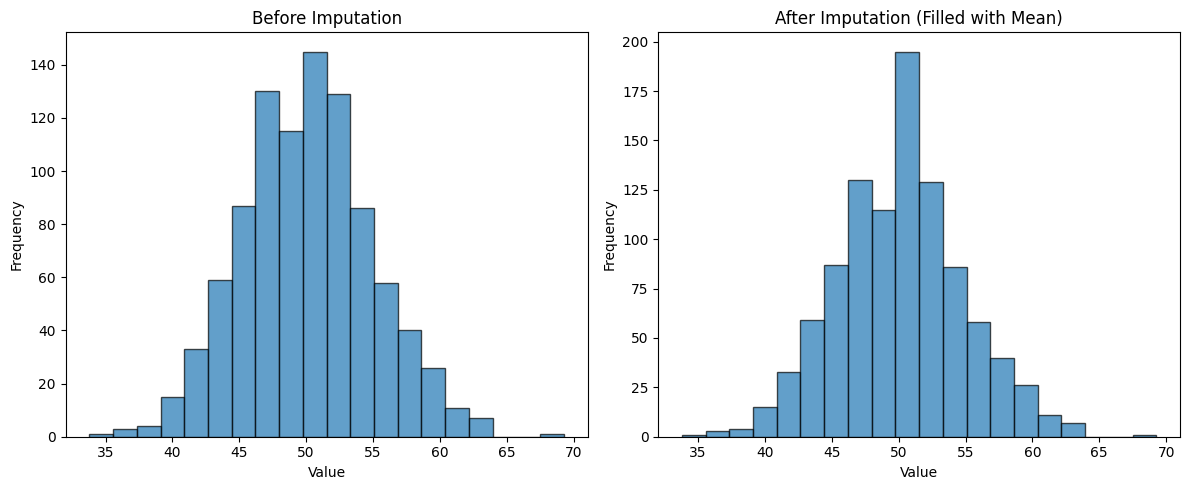

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Generate 1000 samples from a normal distribution
np.random.seed(42)
data = np.random.normal(loc=50, scale=5, size=1000)
df = pd.DataFrame(data, columns=['Values'])

# Step 2: Introduce 50 random missing values
missing_indices = np.random.choice(df.index, size=50, replace=False)
df.loc[missing_indices, 'Values'] = np.nan

# Step 3: Plot histogram BEFORE imputation
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.hist(df['Values'], bins=20, edgecolor='black', alpha=0.7)
plt.title("Before Imputation")
plt.xlabel("Value")
plt.ylabel("Frequency")

# Step 4: Fill missing values with column mean
mean_value = df['Values'].mean()
df['Values']=df['Values'].fillna(mean_value)

# Step 5: Plot histogram AFTER imputation
plt.subplot(1,2,2)
plt.hist(df['Values'], bins=20, edgecolor='black', alpha=0.7)
plt.title("After Imputation (Filled with Mean)")
plt.xlabel("Value")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()


In [14]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Original data
data = np.array([2, 5, 10, 15, 20]).reshape(-1, 1)

# Initialize the scaler
scaler = MinMaxScaler()

# Fit and transform the data
scaled_data = scaler.fit_transform(data)

# Print the scaled array
print("Original Data:\n", data.flatten())
print("Scaled Data (0 to 1 range):\n", scaled_data.flatten())


Original Data:
 [ 2  5 10 15 20]
Scaled Data (0 to 1 range):
 [0.         0.16666667 0.44444444 0.72222222 1.        ]


In [17]:
# Step 0: imports
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline as SKPipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline

# -------------------------
# Step 1: Create example dataset
# -------------------------
data = {
    'Age': [25, np.nan, 30, 40, 22, np.nan, 35, 28, np.nan, 45],
    'TransactionAmount': [100, 20000, 150, 300, 50000, 400, 350, 100000, 700, 600],
    'PaymentMethod': ['Cash', 'CreditCard', 'DebitCard', 'Cash', 'CreditCard',
                      'DebitCard', 'Cash', 'CreditCard', 'DebitCard', 'Cash'],
    'Fraud': [0, 1, 0, 0, 1, 0, 0, 1, 0, 0]
}
df = pd.DataFrame(data)

# -------------------------
# Step 2: Features & target
# -------------------------
X = df.drop('Fraud', axis=1).copy()
y = df['Fraud'].copy()

# -------------------------
# Step 3: Simple outlier capping for TransactionAmount (IQR)
# -------------------------
q1 = X['TransactionAmount'].quantile(0.25)
q3 = X['TransactionAmount'].quantile(0.75)
iqr = q3 - q1
lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr
X['TransactionAmount'] = X['TransactionAmount'].clip(lower, upper)

# -------------------------
# Step 4: Train-test split (stratify to keep fraud ratio)
# -------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# -------------------------
# Step 5: Choose SMOTE k_neighbors dynamically (safe for small datasets)
# -------------------------
minority_count = y_train.value_counts().min()
if minority_count <= 1:
    # Too few minority samples — can't apply SMOTE
    use_smote = False
    print("SMOTE skipped: too few minority samples in training set. Using class_weight instead.")
else:
    use_smote = True
    k_neighbors = min(5, max(1, minority_count - 1))  # at least 1
    print(f"SMOTE will be used with k_neighbors = {k_neighbors} (minority_count = {minority_count})")

# --


SMOTE will be used with k_neighbors = 1 (minority_count = 2)
